In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
# import cmocean.cm as cmo
import csv
import statsmodels.api as sm
from scipy import stats

# Nitrogen data

In [115]:
myfile = '~/Documents/GitHub/data/cleaned_ndata_12-22-2019.csv'
ndata = pd.read_csv(myfile, sep=',') 
ndata = ndata[ndata['Region'] == 'SEUS']
ndata = ndata[['Sample ID2', 'Glu','Asp','Ala','Ile','Leu','Pro','Val','Gly','Ser','Lys','Tyr','Phe','Thr']]
q = ndata[ndata['Sample ID2'] == "Savannah Banks-4902"]
w = ndata[ndata['Sample ID2'] == "Jacksonville-4907"]
e = ndata[ndata['Sample ID2'] == "Jacksonville-4684"]

mean = q.mean(axis=0)
std = q.std(axis=0)
sav = pd.DataFrame(mean,columns = ['sav4902_mean'])
sav['sav4902_std'] = std

mean = w.mean(axis=0)
std = w.std(axis=0)
jack1 = pd.DataFrame(mean,columns = ['jack4907_mean'])
jack1['jack4907_std'] = std

mean = w.mean(axis=0)
std = w.std(axis=0)
jack2 = pd.DataFrame(mean,columns = ['jack4684_mean'])
jack2['jack4684_std'] = std

df = pd.concat([sav, jack1, jack2], axis=1)
df.index.name = 'amino acid'
df.reset_index(inplace=True)

pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

   amino acid  sav4902_mean  sav4902_std  jack4907_mean  jack4907_std  \
0         Glu     16.327143     1.690589        16.0400      1.319267   
1         Asp     17.944286     2.799184        13.6475      1.046275   
2         Ala     19.772857     1.851366        16.7300      2.491947   
3         Ile     23.741429     1.632987        19.7925      0.487673   
4         Leu     23.347143     2.235693        19.1900      1.845373   
5         Pro     32.395714     1.835891        25.7575      0.647167   
6         Val     21.374286     0.968880        16.1200      1.354425   
7         Gly     11.552857     0.817042        11.6075      1.039659   
8         Ser     12.932857     2.462314         8.6225      2.726284   
9         Lys           NaN          NaN            NaN           NaN   
10        Tyr           NaN          NaN            NaN           NaN   
11        Phe     10.104286     1.926533        10.8725      1.957096   
12        Thr           NaN          NaN           

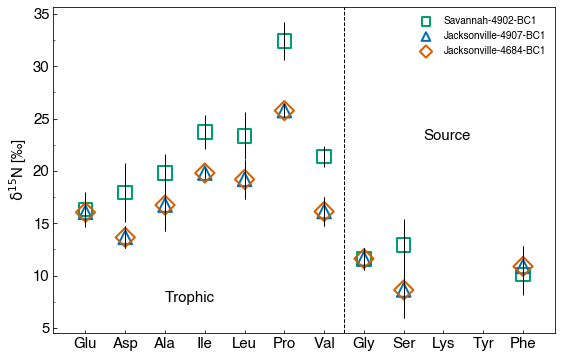

In [221]:
mpl.rc('font',family='Helvetica')
fig, ax = plt.subplots(figsize=(9, 6))
x = df['amino acid']
n = r'$\mathrm{\delta}^{15}$N ['u"\u2030]"
markersize = 12
size = 185

linewidth = 1
plt.errorbar(x,df['sav4902_mean'], yerr=[df['sav4902_std'],df['sav4902_std']], fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x,df['jack4907_mean'], yerr=[df['jack4907_std'],df['jack4907_std']], fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(x,df['jack4684_mean'], yerr=[df['jack4684_std'],df['jack4684_std']], fmt='o', color = 'black', linewidth = linewidth, markerfacecolor = 'None', markeredgecolor = 'None')

# ax.plot(x, 'sav4902_mean', data = df, marker = 's', markersize = markersize, 
#         linewidth = 0, label = 'Savannah-4902-BC1', markeredgecolor = '#009E73', markerfacecolor = 'None')
# ax.plot(x, 'jack4907_mean', data = df, marker = '^', markersize = markersize, 
#         linewidth = 0, label = 'Jacksonville-4907-BC1', markeredgecolor = '#0072B2', markerfacecolor = 'None')
# ax.plot(x, 'jack4684_mean', data = df, marker = 'o', markersize = markersize,
#         linewidth = 0, label = 'Jacksonville-4686-BC1', markeredgecolor = '#D55E00', markerfacecolor = 'None')
ax.scatter(x, 'sav4902_mean', data = df, marker = 's', s = size,
        linewidth = 2, label = 'Savannah-4902-BC1', edgecolor = '#009E73', facecolor = 'None')
ax.scatter(x, 'jack4907_mean', data = df, marker = '^', s = size,
        linewidth = 2, label = 'Jacksonville-4907-BC1', edgecolor = '#0072B2', facecolor = 'None')
ax.scatter(x, 'jack4684_mean', data = df, marker = 'D', s = size,
        linewidth = 2, label = 'Jacksonville-4684-BC1', edgecolor = '#D55E00', facecolor = 'None')

ax.set_ylabel(n, size = 15)
for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
    tick.set_fontsize(15)
plt.axvline(x=6.5, linewidth = 1, color = 'black', linestyle = '--')

lgnd = plt.legend(frameon = False, loc = 0)
lgndsize = 75
lgnd.legendHandles[0]._sizes = [lgndsize]
lgnd.legendHandles[1]._sizes = [lgndsize]
lgnd.legendHandles[2]._sizes = [lgndsize]

plt.text(8.5, 23, "Source", fontsize=15)
plt.text(2, 7.5, "Trophic", fontsize=15)

# ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(direction='in', which = 'both')

plt.savefig('fig_mean_aa_plot.png', dpi = 300, bbox_inches='tight')